# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime, timezone

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


739

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
temp=[]
cityList=[]
country=[]
lat=[]
lon=[]
cloudiness=[]
humidity=[]
date=[]
maxTemp=[]
wind=[]
timezone=[]
localTimestamp=[]

print("Beginning Data Retrieval")
print("---------------------------")
for city in cities:
    # Build query URL and request your results
    try:

        query_url = f"{url}appid={api_key}&q={city}&units={units}"
        print(f"Retrieving records for | {city}")
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        # Extracting values for plotting
        if weather_json["cod"] != "404":
            cityList.append(city)
            temp.append(weather_json['main']['temp'])
            country.append(weather_json['sys']['country'])
            lat.append(weather_json['coord']['lat'])
            lon.append(weather_json['coord']['lon'])
            cloudiness.append(weather_json['clouds']['all'])
            wind.append(weather_json['wind']['speed'])
            date.append(weather_json['dt'])
            humidity.append(weather_json['main']['humidity'])
            maxTemp.append(weather_json['main']['temp_max'])
            timezone.append(weather_json['timezone'])
            localDate = int(weather_json['dt']) + int(weather_json['timezone'])
            ts=datetime.fromtimestamp(localDate).strftime('%m-%d-%y')
            localTimestamp.append(ts)
            
    except  Exception as e:
        print(f"city({city}) not found!! skipping")
        print(e)
        pass
print("--------------------------------")
print("Data Retrieval Complete ")
print("--------------------------------")

Beginning Data Retrieval
---------------------------
Retrieving records for | punta arenas
Retrieving records for | mataura
Retrieving records for | yanam
Retrieving records for | poum
Retrieving records for | bluff
Retrieving records for | kavieng
Retrieving records for | pajapan
Retrieving records for | topolobampo
Retrieving records for | saint-philippe
Retrieving records for | saint george
Retrieving records for | pevek
Retrieving records for | riyadh
Retrieving records for | vanimo
Retrieving records for | ushuaia
Retrieving records for | east london
Retrieving records for | esperance
Retrieving records for | barentsburg
Retrieving records for | palmer
Retrieving records for | tual
Retrieving records for | rikitea
Retrieving records for | busselton
Retrieving records for | santa maria
Retrieving records for | broken hill
Retrieving records for | gangotri
Retrieving records for | amderma
Retrieving records for | torbay
Retrieving records for | fortuna
Retrieving records for | sept-

Retrieving records for | aguimes
Retrieving records for | along
Retrieving records for | tumannyy
Retrieving records for | havoysund
Retrieving records for | harrisburg
Retrieving records for | sarangani
Retrieving records for | kaa-khem
Retrieving records for | rocha
Retrieving records for | kurush
Retrieving records for | pimentel
Retrieving records for | namibe
Retrieving records for | gimli
Retrieving records for | luwuk
Retrieving records for | gayeri
Retrieving records for | sulmona
Retrieving records for | araceli
Retrieving records for | reo
Retrieving records for | karratha
Retrieving records for | tefe
Retrieving records for | pozo colorado
Retrieving records for | kloulklubed
Retrieving records for | chiang klang
Retrieving records for | katobu
Retrieving records for | chilca
Retrieving records for | antsohihy
Retrieving records for | nakonde
Retrieving records for | mys shmidta
Retrieving records for | ukiah
Retrieving records for | la paz
Retrieving records for | linxia
Re

Retrieving records for | katangli
Retrieving records for | bereda
Retrieving records for | atasu
Retrieving records for | aykhal
Retrieving records for | det udom
Retrieving records for | tab
Retrieving records for | dubbo
Retrieving records for | terrasini
Retrieving records for | charlottesville
Retrieving records for | sedelnikovo
Retrieving records for | miles city
Retrieving records for | araouane
Retrieving records for | minas de barroteran
Retrieving records for | vychegodskiy
Retrieving records for | nguiu
Retrieving records for | jyvaskyla
Retrieving records for | bam
Retrieving records for | maicao
Retrieving records for | aswan
Retrieving records for | si bun ruang
Retrieving records for | pagudpud
Retrieving records for | viytivka
Retrieving records for | keita
Retrieving records for | riberalta
Retrieving records for | burnie
Retrieving records for | svetlogorsk
Retrieving records for | konevo
Retrieving records for | anapolis
Retrieving records for | atbasar
Retrieving re

Retrieving records for | roald
Retrieving records for | rudnyy
Retrieving records for | pimenta bueno
Retrieving records for | okato
Retrieving records for | cochrane
Retrieving records for | godda
Retrieving records for | sidi ali
Retrieving records for | mindelo
Retrieving records for | nemuro
Retrieving records for | chase
Retrieving records for | kita
Retrieving records for | axim
Retrieving records for | edwardsville
Retrieving records for | munkebo
Retrieving records for | cervo
Retrieving records for | platteville
Retrieving records for | tugalan
Retrieving records for | kijang
Retrieving records for | grand baie
Retrieving records for | eldikan
Retrieving records for | ust-koksa
Retrieving records for | redcliffe
Retrieving records for | road town
Retrieving records for | sterling
--------------------------------
Data Retrieval Complete 
--------------------------------


In [10]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": cityList,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Temp": temp,
    "Lat":lat,
    "Lon":lon,
    "Max Temp":maxTemp,
    "Wind Speed":wind,
    "Date-Local": localTimestamp
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lon,Max Temp,Wind Speed,Date-Local
0,punta arenas,20,CL,1562096397,74,35.40,-53.16,-70.91,35.60,6.93,07-02-19
1,mataura,77,NZ,1562096401,87,46.00,-46.19,168.86,46.00,1.01,07-03-19
2,yanam,100,IN,1562096517,81,79.28,16.73,82.22,79.28,11.50,07-02-19
3,poum,0,MK,1562096518,56,71.60,41.28,20.71,71.60,2.42,07-02-19
4,bluff,0,AU,1562096392,84,57.50,-23.58,149.07,57.50,5.01,07-02-19


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
WeatherDataCSV=weather_data.to_csv(r'/Users/nithavijaysudh/Projects/WeatherAPI/Resources/weatherData.csv',index=False,header=True)



### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

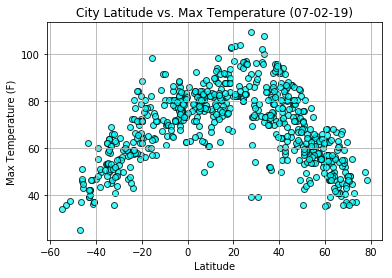

In [12]:
#Defining the max and min values for axises
xMax=weather_data['Lat'].max()
xMin=weather_data['Lat'].min()
yMax=weather_data['Max Temp'].max()
yMin=weather_data['Max Temp'].min()

#Assigning x and y axis data for plotting
x=weather_data['Lat']
y=weather_data['Max Temp']

fig, bubblePlot = plt.subplots()
plt.grid(True)
bubblePlot.scatter(x, y, c='cyan', marker="o",label=None, edgecolors="black", alpha=0.75)

#Display Title, x and y axiis label
plt.title(f"City Latitude vs. Max Temperature ({ts})")
plt.xlabel("Latitude") 
plt.ylabel("Max Temperature (F)")

#saving plot image to Image folder
fig.savefig('Images/LatvsMaxTemp.png')

#### Latitude vs. Humidity Plot

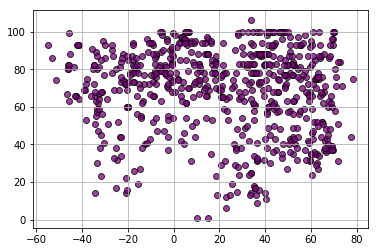

In [21]:
#Defining the max and min values for axises
xMax=weather_data['Lat'].max()
xMin=weather_data['Lat'].min()
yMax=weather_data['Humidity'].max()
yMin=weather_data['Humidity'].min()

#Assigning x and y axis data for plotting
x=weather_data['Lat']
y=weather_data['Humidity']

fig, bubblePlot = plt.subplots()
plt.grid(True)
bubblePlot.scatter(x, y, c='purple', marker="o",label=None, edgecolors="black", alpha=0.75)

#Display Title, x and y axiis label
plt.title(f"City Latitude vs. Humidity ({ts})")
plt.xlabel("Latitude") 
plt.ylabel("Humidity (%)")

#Saving plot image to Image folder
fig.savefig('Images/LatvsHumidity.png')

#### Latitude vs. Cloudiness Plot

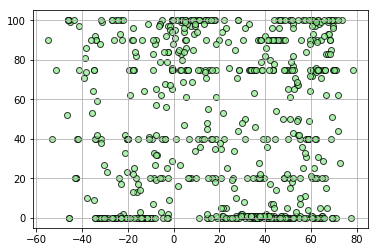

In [25]:
#Defining the max and min values for axises
xMax=weather_data['Lat'].max()
xMin=weather_data['Lat'].min()
yMax=weather_data['Cloudiness'].max()
yMin=weather_data['Cloudiness'].min()

#Assigning x and y axis data for plotting
x=weather_data['Lat']
y=weather_data['Cloudiness']
fig, bubblePlot = plt.subplots()
plt.grid(True)
bubblePlot.scatter(x, y, c='lightgreen', marker="o",label=None, edgecolors="black", alpha=0.75)

#Display Title, x and y axiis label
plt.title(f"City Latitude vs. Cloudiness ({ts})")
plt.xlabel("Latitude") 
plt.ylabel("Cloudiness (%)")

#Saving plot image to Image folder
fig.savefig('Images/LatvsCloudiness.png')

#### Latitude vs. Wind Speed Plot

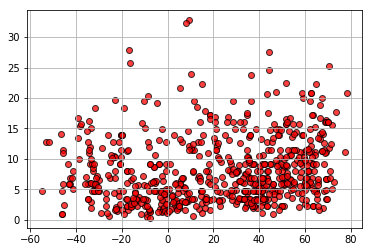

In [26]:
#Defining the max and min values for axises
xMax=weather_data['Lat'].max()
xMin=weather_data['Lat'].min()
yMax=weather_data['Wind Speed'].max()
yMin=weather_data['Wind Speed'].min()

#Assigning x and y axis data for plotting
x=weather_data['Lat']
y=weather_data['Wind Speed']

fig, bubblePlot = plt.subplots()
plt.grid(True)
bubblePlot.scatter(x, y, c='red', marker="o",label=None, edgecolors="black", alpha=0.75)

#Display Title, x and y axiis label
plt.title(f"City Latitude vs. Wind Speed ({ts})")
plt.xlabel("Latitude") 
plt.ylabel("Wind Speed (mph)")

#Saving plot image to Image folder
fig.savefig('Images/LatvsWindSpeed.png')
